In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import svm
import xgboost as xgb

## Read in the training/test data

In [2]:
#Read in the training data
train = pd.read_csv('train.csv')
#Read in the test data
test = pd.read_csv('test.csv')

In [3]:
#Scale the training data
scaler = StandardScaler()
train[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']] = scaler.fit_transform(train[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']])
#Scale the test data
test[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']] = scaler.transform(test[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']])

In [7]:
#Split into x and y for training set
x_train = train.drop('readmitted', axis = 1)
y_train = train['readmitted']
#Split into x and y for test set
x_test = test.drop('readmitted', axis = 1)
y_test = test['readmitted']

## Set up functions to analyze model results

In [43]:
# SOURCE: This confusion matrix code is adapted from Peyton Lewis' and Aidan Cremins' Advanced Corporate Finance course's 
# Credit Ratings Analysis assigment for Professor Michael Sury.

def create_confusion_matrix(test_vals, pred_vals, model_name):

    conf_mat = confusion_matrix(test_vals, pred_vals)

    sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    
    #Change the 0's and 1's to the actual class names for clearer interpretation
    plt.xticks(ticks=[0.5,1.5], labels=['Not Readmitted','Readmitted'])
    plt.yticks(ticks=[0.5,1.5], labels=['Not Readmitted','Readmitted'])
    plt.title('Confusion Matrix for {} Model'.format(model_name))

In [10]:
# SOURCE: This ROC curve code is adapted from Peyton Lewis' and Aidan Cremins' Advanced Corporate Finance course's 
# Credit Ratings Analysis assigment for Professor Michael Sury.

def create_roc_curve(model, x_test, y_test, model_name):
    metrics.plot_roc_curve(model, x_test, y_test, name=model_name)
    plt.plot([0,1],[0,1], linestyle='--', label='Baseline Classifier',color = 'red')
    plt.grid()
    plt.legend()

In [11]:
# SOURCE: This PR curve code is adapted from Peyton Lewis' and Aidan Cremins' Advanced Corporate Finance course's 
# Credit Ratings Analysis assigment for Professor Michael Sury.

def create_pr_curve(model, x_test, y_test, model_name):
    metrics.plot_precision_recall_curve(model, x_test, y_test, name=model_name)
    positive_rate = sum(y_test)/len(y_test)
    plt.plot([0,1],[positive_rate,positive_rate], linestyle='--', label='Baseline Classifier',color = 'red')
    plt.grid()
    plt.legend()

## Begin model fitting

### SVM - Equal Class Weights

In [12]:
#Fit the SVM model with a linear kernel and equal class weighting
svm_mod = svm.SVC(random_state=1, kernel='rbf',class_weight = {0:1,1:1})
#Fit on the training set
svm_mod = svm_mod.fit(x_train,y_train)

array([[27507,  3457],
       [ 7955, 11698]], dtype=int64)

Test Accuracy:  0.7648313874236946


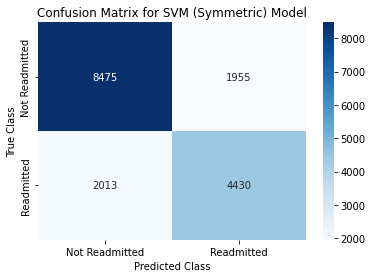

In [45]:
#Predict on the test set
y_pred = svm_mod.predict(x_test)
#Make the confusion matrix for the test set
create_confusion_matrix(y_test, y_pred, 'SVM (Symmetric)')
#Get the test set accuracy
print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred))

C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


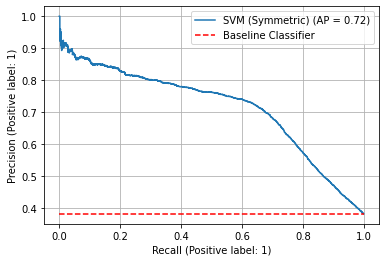

In [18]:
#Make the precision-recall curve for the test set
create_pr_curve(svm_mod, x_test, y_test, 'SVM (Symmetric)')

C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


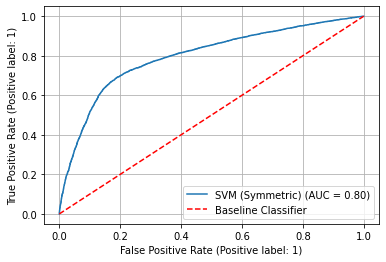

In [24]:
#Make the ROC curve for the test set
create_roc_curve(svm_mod, x_test, y_test, 'SVM (Symmetric)')

### SVM - 1:2 Class Weights

In [19]:
#Fit the SVM model with a linear kernel and 1:2 class weighting
svm_mod_asymmetric = svm.SVC(random_state=1, kernel='rbf',class_weight = {0:1,1:2})
#Fit on the training set
svm_mod_asymmetric = svm_mod_asymmetric.fit(x_train,y_train)

Test Accuracy:  0.7648313874236946


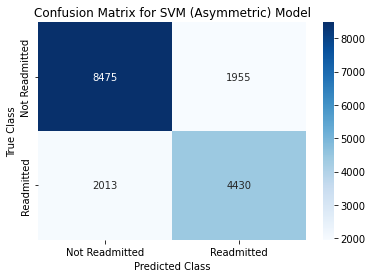

In [46]:
#Predict on the test set
y_pred = svm_mod_asymmetric.predict(x_test)
#Make the confusion matrix for the test set
create_confusion_matrix(y_test, y_pred, 'SVM (Asymmetric)')
#Get the test set accuracy
print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred))

C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


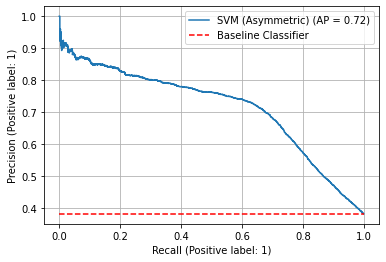

In [23]:
#Make the precision-recall curve for the test set
create_pr_curve(svm_mod_asymmetric, x_test, y_test, 'SVM (Asymmetric)')

C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


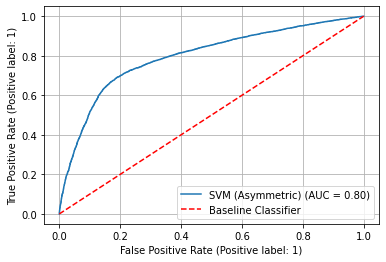

In [25]:
#Make the ROC curve for the test set
create_roc_curve(svm_mod_asymmetric, x_test, y_test, 'SVM (Asymmetric)')

## Trying to model the multiclass problem

In [26]:
#Read in the multiclass train and test data
train_multiclass = pd.read_csv('train_multiclass.csv')
test_multiclass = pd.read_csv('test_multiclass.csv')
#Split into x and y for training set
x_train_multiclass = train_multiclass.drop('readmitted', axis = 1)
y_train_multiclass = train_multiclass['readmitted']
#Split into x and y for test set
x_test_multiclass = test_multiclass.drop('readmitted', axis = 1)
y_test_multiclass = test_multiclass['readmitted']

In [28]:
#Modify the earlier confusion matrix function to work with multiclass data
def create_confusion_matrix(test_vals, pred_vals, model_name,labels):
    plt.figure(figsize=(8,6))
    conf_mat = confusion_matrix(test_vals, pred_vals)
    sns.heatmap(conf_mat, annot=True, cmap='Blues',fmt='g', cbar=False,annot_kws={"size": 15})
    plt.xlabel('Predicted Class', fontsize=15)
    plt.ylabel('True Class', fontsize=15)
    #Change the 0's and 1's to the actual class names for clearer interpretation
    plt.xticks(ticks=[0.5,1.5,2.5], labels=labels, fontsize=15)
    plt.yticks(ticks=[0.5,1.5,2.5], labels=labels, fontsize=15)
    plt.title('Multiclass Confusion Matrix for {} Model'.format(model_name), fontsize=20)

In [40]:
#Fit a random forest model because it's quick just to see how we do with the multiclass problem
rf_multiclass = RandomForestClassifier(random_state=1,max_depth=5, n_estimators=500, class_weight = {'NO':1,'>30':2,'<30':5})
rf_multiclass.fit(x_train_multiclass, y_train_multiclass)
rf_pred_multiclass = rf_multiclass.predict(x_test_multiclass)

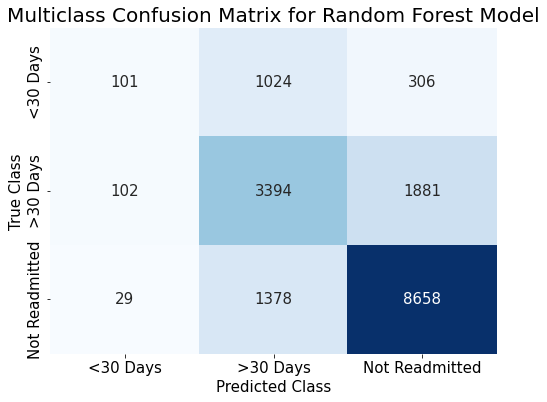

In [41]:
#Make the confusion matrix for the test set
create_confusion_matrix(y_test_multiclass, rf_pred_multiclass, 'Random Forest',['<30 Days','>30 Days','Not Readmitted'])